In [55]:
from pandas_datareader import data, wb
import yfinance as yf
import pandas as pd
import numpy as np
import openpyxl
import datetime
%matplotlib inline

In [5]:
# GS = data.DataReader('GS', 'yahoo', start='2006-01-01', end='2016-01-01')
# from openpyxl import load_workbook, Workbook

In [27]:
GS = yf.download("GS", start="2003-01-01", end="2023-01-01")
MS = yf.download("MS", start="2003-01-01", end="2023-01-01")
BAC = yf.download("BAC", start="2003-01-01", end="2023-01-01")
JPM = yf.download("JPM", start="2003-01-01", end="2023-01-01")
WFC = yf.download("WFC", start="2003-01-01", end="2023-01-01")
C = yf.download("C", start="2003-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
# concatenate the bank dataframes together to a single data frame called bank_stocks
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [29]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2003-01-02   34.955002  35.424999  34.720001  35.340000  22.092304  12584000   
2003-01-03   35.049999  35.279999  34.770000  35.119999  21.954792   7803400   
2003-01-06   34.825001  35.849998  34.505001  35.625000  22.270475  12500600   
2003-01-07   35.630001  35.930000  35.415001  35.680000  22.304852   9804800   
2003-01-08   35.685001  35.685001  35.380001  35.535000  22.214212   8487600   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2003-01-02   357.000000  364.000000  350.899994  363.500000  ...  39.570000   
2003-01-03   363.500000  364.000000  358.100006  361.100006  ...  41.400002   
2003-01-06   363.500000  375.899994  362.700012  373.100006  ...  41.720001   
2003-01-07   373.200012  376.000000  366.799988  369.799988  ...  42.020000   
2003-01-08   365.500000  373.500000  364.100006  366.899994  ...  41.669998   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2003-01-02   41.939999  23.474205  4310700  23.575001  24.350000  23.525000   
2003-01-03   41.860001  23.429430  2963100  24.025000  24.315001  23.945000   
2003-01-06   42.990002  24.061893  4167300  23.900000  24.565001  23.900000   
2003-01-07   43.220001  24.190638  5213800  24.424999  24.549999  24.209999   
2003-01-08   41.919998  23.588537  4054600  24.275000  24.290001  23.805000   

Bank Ticker                                 
Stock Info       Close  Adj Close   Volume  
Date                                        
2003-01-02   24.285000  13.742735  9904200  
2003-01-03   23.945000  13.550334  7808000  
2003-01-06   24.420000  13.819131  8097400  
2003-01-07   24.270000  13.734244  6556200  
2003-01-08   23.924999  13.539009  8071000  

[5 rows x 36 columns]

In [35]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info')
# slicing wrt closing price

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2003-01-02,35.340000,363.500000,69.650002,25.440001,41.939999,24.285000
2003-01-03,35.119999,361.100006,70.379997,25.940001,41.860001,23.945000
2003-01-06,35.625000,373.100006,73.000000,27.980000,42.990002,24.420000
2003-01-07,35.680000,369.799988,72.699997,27.840000,43.220001,24.270000
2003-01-08,35.535000,366.899994,70.919998,26.770000,41.919998,23.924999
...,...,...,...,...,...,...
2022-12-23,32.470001,44.259998,345.510010,131.279999,86.110001,40.980000
2022-12-27,32.529999,44.389999,341.970001,131.740005,85.059998,41.040001
2022-12-28,32.770000,44.619999,340.869995,132.460007,84.459999,41.119999


In [31]:
returns = pd.DataFrame()

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()  # percent change from the previous value
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2003-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-03,-0.006225,-0.006602,0.010481,0.019654,-0.001907,-0.014000
2003-01-06,0.014379,0.033232,0.037227,0.078643,0.026995,0.019837
2003-01-07,0.001544,-0.008845,-0.004110,-0.005004,0.005350,-0.006142
2003-01-08,-0.004064,-0.007842,-0.024484,-0.038434,-0.030079,-0.014215


In [39]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [40]:
# Best Single Day Gain
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [41]:
# Citigroup's largest drop and biggest gain were very close to one another
# because it had a stock split in May 2011, but also JPM day after inauguration.

In [36]:
returns.std() # Citigroup riskiest with the highest standard deviation

BAC Return    0.028989
C Return      0.030701
GS Return     0.021913
JPM Return    0.023001
MS Return     0.030165
WFC Return    0.025009
dtype: float64

In [38]:
returns.min()

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [43]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

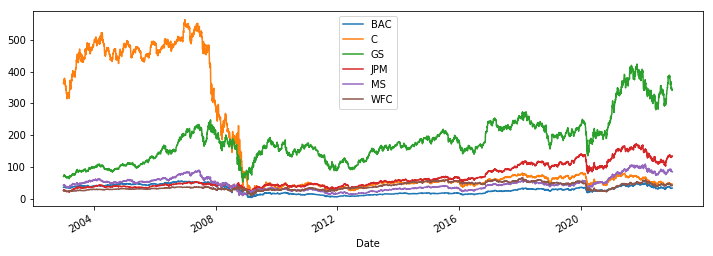

In [48]:
import matplotlib.pyplot as plt

for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

# bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()
# same output

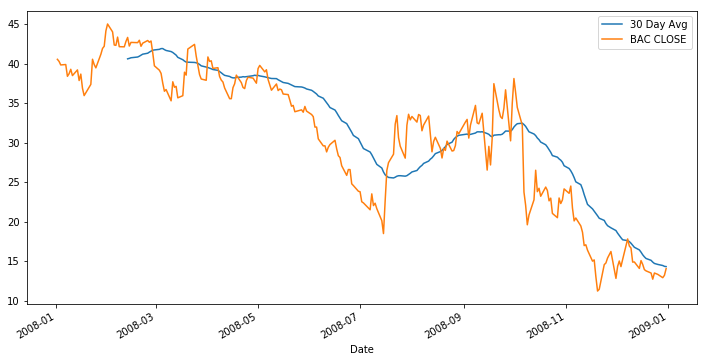

In [50]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

In [68]:
with pd.ExcelWriter('Black_Scholes.xlsx', mode='a', engine='openpyxl', if_sheet_exists='replace') as writer:
    bank_stocks.xs(key='Close',axis=1,level='Stock Info').to_excel(writer, sheet_name='Data')

In [140]:
Expiry = '2024-01-19'
bact = yf.Ticker("BAC").option_chain(Expiry)[0]
ct = yf.Ticker("C").option_chain(Expiry)[0]
gst = yf.Ticker("GS").option_chain(Expiry)[0]
jpmt = yf.Ticker("JPM").option_chain(Expiry)[0]
mst = yf.Ticker("MS").option_chain(Expiry)[0]
wfct = yf.Ticker("WFC").option_chain(Expiry)[0]

In [102]:
options = pd.concat([bact, ct, gst, jpmt, mst, wfct],axis=1,keys=tickers)
# options.xs(key=('contractSymbol', 'lastTradeDate', 'strike', 'lastPrice'),axis=1)

In [128]:
options

BAC                                                       \
        contractSymbol             lastTradeDate strike lastPrice  bid  ask   
0   BAC240119C00015000 2023-03-02 17:21:31+00:00   15.0     18.32  0.0  0.0   
1   BAC240119C00020000 2023-03-02 14:53:45+00:00   20.0     13.95  0.0  0.0   
2   BAC240119C00023000 2023-03-02 16:47:34+00:00   23.0     11.25  0.0  0.0   
3   BAC240119C00025000 2023-03-03 16:01:37+00:00   25.0     10.30  0.0  0.0   
4   BAC240119C00028000 2023-03-06 20:30:51+00:00   28.0      7.95  0.0  0.0   
5   BAC240119C00030000 2023-03-06 20:47:05+00:00   30.0      6.45  0.0  0.0   
6   BAC240119C00033000 2023-03-06 17:46:37+00:00   33.0      4.45  0.0  0.0   
7   BAC240119C00035000 2023-03-06 20:57:15+00:00   35.0      3.28  0.0  0.0   
8   BAC240119C00038000 2023-03-06 19:40:35+00:00   38.0      2.03  0.0  0.0   
9   BAC240119C00040000 2023-03-06 20:10:37+00:00   40.0      1.41  0.0  0.0   
10  BAC240119C00042000 2023-03-06 20:54:56+00:00   42.0      0.90  0.0  0.0   
11  BAC240119C00045000 2023-03-06 20:10:37+00:00   45.0      0.50  0.0  0.0   
12  BAC240119C00047000 2023-03-06 18:27:57+00:00   47.0      0.32  0.0  0.0   
13  BAC240119C00050000 2023-03-06 16:16:20+00:00   50.0      0.19  0.0  0.0   
14  BAC240119C00055000 2023-03-06 17:40:10+00:00   55.0      0.08  0.0  0.0   
15  BAC240119C00060000 2023-03-06 15:59:37+00:00   60.0      0.06  0.0  0.0   
16  BAC240119C00065000 2023-03-06 14:50:34+00:00   65.0      0.04  0.0  0.0   
17  BAC240119C00070000 2023-03-06 17:58:57+00:00   70.0      0.03  0.0  0.0   
18  BAC240119C00075000 2023-03-06 15:51:02+00:00   75.0      0.02  0.0  0.0   
19                 NaN                       NaT    NaN       NaN  NaN  NaN   
20                 NaN                       NaT    NaN       NaN  NaN  NaN   
21                 NaN                       NaT    NaN       NaN  NaN  NaN   
22                 NaN                       NaT    NaN       NaN  NaN  NaN   
23                 NaN                       NaT    NaN       NaN  NaN  NaN   
24                 NaN                       NaT    NaN       NaN  NaN  NaN   
25                 NaN                       NaT    NaN       NaN  NaN  NaN   
26                 NaN                       NaT    NaN       NaN  NaN  NaN   
27                 NaN                       NaT    NaN       NaN  NaN  NaN   
28                 NaN                       NaT    NaN       NaN  NaN  NaN   
29                 NaN                       NaT    NaN       NaN  NaN  NaN   
30                 NaN                       NaT    NaN       NaN  NaN  NaN   
31                 NaN                       NaT    NaN       NaN  NaN  NaN   
32                 NaN                       NaT    NaN       NaN  NaN  NaN   
33                 NaN                       NaT    NaN       NaN  NaN  NaN   
34                 NaN                       NaT    NaN       NaN  NaN  NaN   
35                 NaN                       NaT    NaN       NaN  NaN  NaN   
36                 NaN                       NaT    NaN       NaN  NaN  NaN   
37                 NaN                       NaT    NaN       NaN  NaN  NaN   
38                 NaN                       NaT    NaN       NaN  NaN  NaN   
39                 NaN                       NaT    NaN       NaN  NaN  NaN   
40                 NaN                       NaT    NaN       NaN  NaN  NaN   
41                 NaN                       NaT    NaN       NaN  NaN  NaN   
42                 NaN                       NaT    NaN       NaN  NaN  NaN   
43                 NaN                       NaT    NaN       NaN  NaN  NaN   
44                 NaN                       NaT    NaN       NaN  NaN  NaN   
45                 NaN                       NaT    NaN       NaN  NaN  NaN   
46                 NaN                       NaT    NaN       NaN  NaN  NaN   
47                 NaN                       NaT    NaN       NaN  NaN  NaN   
48                 NaN                       NaT    NaN       NaN  Na

In [138]:
lP = []
cP = []
sP = []
ltD = []
for tick in tickers:
    lP.append(options[tick]['lastPrice'][0])
    sP.append(options[tick]['strike'][0])
    cP.append(yf.Ticker(tick).fast_info['previousClose'])
    ltD.append(options[tick]['lastTradeDate'][0])

In [143]:
from openpyxl.utils import get_column_letter
wb = openpyxl.load_workbook('Black_Scholes.xlsx')
ws = wb['Computation']
for c in range(7, 13):
    char = get_column_letter(c)
    ws[char+str(27)] = lP[c-7]  # last trading price
    ws[char+str(8)] = cP[c-7]  # Stock price
    ws[char+str(5)] = sP[c-7]  # Strike price
    
for r in range(3, 9):
    ws['B'+str(r)] = tickers[r-3]
    ws['C'+str(r)] = Expiry
    
wb.save('Black_Scholes.xlsx')

In [ ]:
# import seaborn as sns

# sns.pairplot(returns[1:])
## Visualization on Citigroup's Stock Crash.

# sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)